In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n = int(1e3)
x = np.linspace(0, 0.31, n)

In [3]:
x

array([0.        , 0.00031031, 0.00062062, 0.00093093, 0.00124124,
       0.00155155, 0.00186186, 0.00217217, 0.00248248, 0.00279279,
       0.0031031 , 0.00341341, 0.00372372, 0.00403403, 0.00434434,
       0.00465465, 0.00496496, 0.00527528, 0.00558559, 0.0058959 ,
       0.00620621, 0.00651652, 0.00682683, 0.00713714, 0.00744745,
       0.00775776, 0.00806807, 0.00837838, 0.00868869, 0.008999  ,
       0.00930931, 0.00961962, 0.00992993, 0.01024024, 0.01055055,
       0.01086086, 0.01117117, 0.01148148, 0.01179179, 0.0121021 ,
       0.01241241, 0.01272272, 0.01303303, 0.01334334, 0.01365365,
       0.01396396, 0.01427427, 0.01458458, 0.01489489, 0.01520521,
       0.01551552, 0.01582583, 0.01613614, 0.01644645, 0.01675676,
       0.01706707, 0.01737738, 0.01768769, 0.017998  , 0.01830831,
       0.01861862, 0.01892893, 0.01923924, 0.01954955, 0.01985986,
       0.02017017, 0.02048048, 0.02079079, 0.0211011 , 0.02141141,
       0.02172172, 0.02203203, 0.02234234, 0.02265265, 0.02296

In [4]:
orange = 45 + 2*np.cos(10*x % 1)/2

In [5]:
orange

array([46.        , 45.99999519, 45.99998074, 45.99995667, 45.99992297,
       45.99987964, 45.99982668, 45.99976409, 45.99969188, 45.99961004,
       45.99951858, 45.99941749, 45.99930677, 45.99918644, 45.99905648,
       45.99891691, 45.99876771, 45.9986089 , 45.99844047, 45.99826242,
       45.99807477, 45.9978775 , 45.99767063, 45.99745414, 45.99722806,
       45.99699237, 45.99674708, 45.99649219, 45.99622771, 45.99595363,
       45.99566997, 45.99537671, 45.99507387, 45.99476145, 45.99443946,
       45.99410788, 45.99376673, 45.99341602, 45.99305573, 45.99268589,
       45.99230649, 45.99191753, 45.99151902, 45.99111096, 45.99069336,
       45.99026622, 45.98982954, 45.98938333, 45.9889276 , 45.98846234,
       45.98798757, 45.98750328, 45.98700948, 45.98650618, 45.98599338,
       45.98547108, 45.98493929, 45.98439803, 45.98384728, 45.98328705,
       45.98271736, 45.98213821, 45.9815496 , 45.98095154, 45.98034403,
       45.97972708, 45.9791007 , 45.97846489, 45.97781966, 45.97

In [6]:
from math import pi

In [7]:
angles = np.linspace(-2*pi, 2*pi, n)

In [8]:
import pandas as pd
df = pd.DataFrame({'x': x, 
                   'orange': orange, 
                   'white': orange - 6, 
                   'green': orange - 12,
                   'pole': np.linspace(0, 49, n),
                   'chakra_x': 0.16 + 0.04*np.cos(angles),
                   'chakra_y': 38 + 3*np.sin(angles)
                  })

In [9]:
spoke_angles = np.linspace(0, 2*pi, 24)

In [10]:
def get_spoke_points(angle):
    start_x = 0.16
    end_x = 0.16 + 0.04*np.cos(angle)
    if start_x == end_x:
        x_seq = np.array([0.16]*int(100))
    else:
        x_seq = np.linspace(start_x, end_x, 100)
    
    start_y = 38
    end_y = 38 + 3*np.sin(angle)
    if start_y == end_y:
        y_seq = np.array([38]*int(100))
    else:
        y_seq = np.linspace(start_y, end_y, 100)    
    
    spoke_points = pd.DataFrame({'x': x_seq, 'y': y_seq})
    return spoke_points

In [11]:
spokes = pd.DataFrame()

In [12]:
for spoke_angle in spoke_angles:
    points = get_spoke_points(spoke_angle)
    spokes = spokes.append(points)

In [13]:
spokes.head()

,x,y
0,0.160000,38.0
1,0.160404,38.0
2,0.160808,38.0
3,0.161212,38.0
4,0.161616,38.0


In [14]:
spoke_sample = spokes

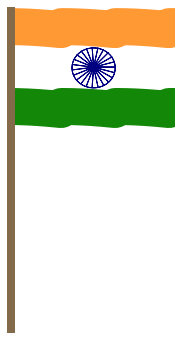

<Figure size 432x288 with 0 Axes>

In [15]:
plt.figure(figsize=(3,6))
plt.plot(df['x'], df['orange'], linewidth = 37, color = '#FF9933')
plt.plot(df['x'], df['white'], linewidth = 37, color = '#FFFFFF')
plt.plot(df['x'], df['green'], linewidth = 37, color = '#138808')
plt.plot(np.zeros(n), df['pole'], linewidth = 15, color = '#826a4b')
plt.plot(df['chakra_x'], df['chakra_y'] + 1.8, linewidth = 1, color = '#000080')
plt.plot(spoke_sample['x'], spoke_sample['y'] + 1.9, linewidth = 1, color = '#000080')
plt.xlim(0, 0.31)
plt.ylim(0, 49)
plt.xticks([])
plt.yticks([])
plt.axis("off")
plt.show()
plt.savefig('flag-py.png', dpi = 300)